In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px

warnings.simplefilter(action='ignore', category=FutureWarning)

file_path = 'logs_co2.txt'
col_names = ["date","co2","temp_c","rel_hum","comment"]
data = pd.read_csv(file_path,delimiter=',',skiprows=2,names=col_names)

data


,date,co2,temp_c,rel_hum,comment
0,2024-01-11T16:25:37.033570,1379.499512,24.930573,27.566528,NaN
1,2024-01-11T16:25:47.951856,1381.997192,24.914551,27.622986,opened
2,2024-01-11T16:26:18.076117,1402.403442,24.647514,26.037598,NaN
3,2024-01-11T16:26:48.205757,1281.721436,24.407188,25.686646,NaN
4,2024-01-11T16:27:18.315896,1266.027466,24.292366,26.428223,NaN
...,...,...,...,...,...
2608,2024-01-15T22:08:57.547641,1093.811157,24.548714,29.809570,NaN
2609,2024-01-15T22:18:57.733305,1160.811646,24.604790,30.415344,NaN
2610,2024-01-15T22:28:57.832512,1239.343262,24.562065,30.845642,NaN
2611,2024-01-15T22:38:57.938306,1309.256348,24.591438,31.292725,NaN


In [2]:
data['co2'] = pd.to_numeric(data['co2'], errors='coerce')
data['date'] = pd.to_datetime(data['date']).dt.floor('S')
data.reset_index(inplace=True, drop=False)


In [3]:
data = data[data['date']>'2024-01-15 13:10:00']

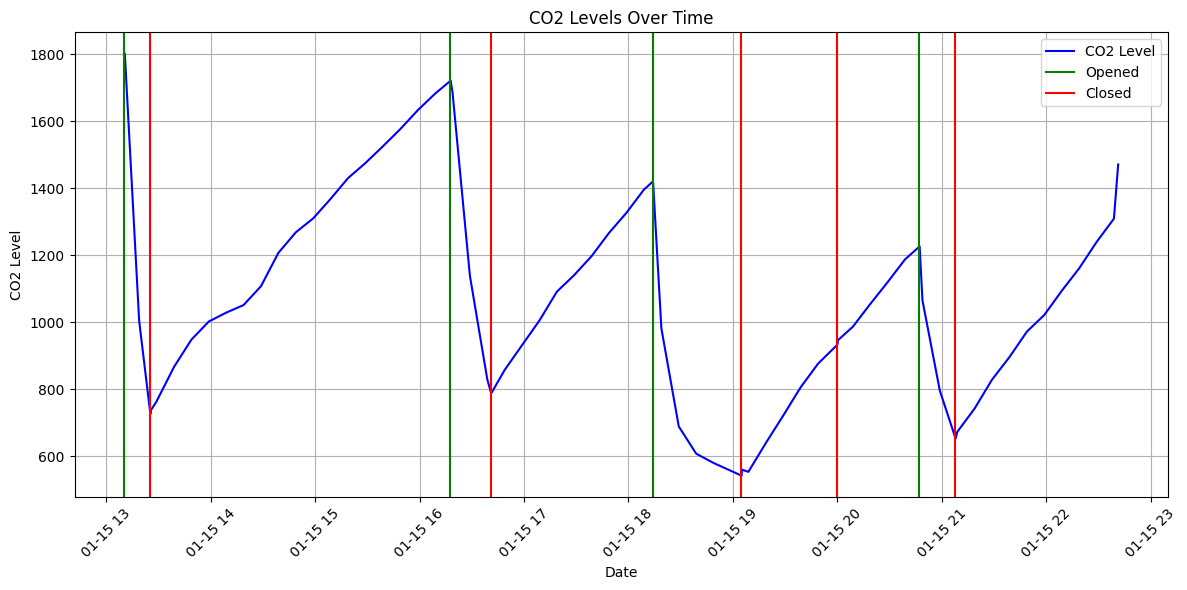

In [7]:
# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['co2'], label='CO2 Level', color='blue')

# Add vertical lines for 'opened' and 'closed' comments
for index, row in data.iterrows():
    if row['comment'] == 'opened':
        plt.axvline(x=row['date'], color='green', label='Opened' if 'Opened' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif row['comment'] == 'closed':
        plt.axvline(x=row['date'], color='red', label='Closed' if 'Closed' not in plt.gca().get_legend_handles_labels()[1] else "")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.title('CO2 Levels Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('co2_levels.png')
# Show the plot
plt.show()

In [6]:
data['in_seconds'] = data['date'].dt.second* + data['date'].dt.minute*60 + data['date'].dt.hour*3600 + data['date'].dt.day*3600*24

C:\Users\illia\AppData\Local\Temp\ipykernel_12348\2481890879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['in_seconds'] = data['date'].dt.second* + data['date'].dt.minute*60 + data['date'].dt.hour*3600 + data['date'].dt.day*3600*24


In [7]:
data['in_seconds']=data['date'].dt.second + data['date'].dt.minute*60 + data['date'].dt.hour*3600

C:\Users\illia\AppData\Local\Temp\ipykernel_12348\811881250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['in_seconds']=data['date'].dt.second + data['date'].dt.minute*60 + data['date'].dt.hour*3600


In [8]:
data[(data['in_seconds'] > 67000) & (data['in_seconds'] < 70000)]

,index,date,co2,temp_c,rel_hum,comment,in_seconds
2575,2575,2024-01-15 18:38:54,608.103638,22.484550,26.748657,NaN,67134
2576,2576,2024-01-15 18:48:54,580.258240,22.383080,26.281738,NaN,67734
2577,2577,2024-01-15 18:58:54,556.756042,22.511253,25.750732,NaN,68334
2578,2578,2024-01-15 19:04:52,542.611206,22.439156,25.305176,closed,68692
2579,2579,2024-01-15 19:05:02,542.319397,22.439156,25.538635,NaN,68702
2580,2580,2024-01-15 19:05:12,560.486145,22.425804,25.566101,NaN,68712
2581,2581,2024-01-15 19:08:54,553.755859,23.005264,25.718689,NaN,68934
2582,2582,2024-01-15 19:18:55,639.661804,23.798355,26.893616,NaN,69535


In [76]:
plt.figure()
plt.plot(data['in_seconds'],data["co2"])

for index,row in data.iterrows():
    if row['comment'] == "closed":
        plt.axvline(row['in_seconds'],color='red',label='Opened' if 'Opened' not in plt.gca().get_legend_handles_labels()[1] else "",)
    elif row['comment'] == 'opened':
        plt.axvline(row['in_seconds'],color='green',label='Closed' if 'Closed' not in plt.gca().get_legend_handles_labels()[1] else "")
plt.legend()
plt.savefig('away_from_window_plot.png')

KeyError: 'in_seconds'

<Figure size 640x480 with 0 Axes>

In [10]:
ind = data[data['comment'].isna() == False].index

In [11]:
ind = list(ind)
ind

[2528, 2532, 2552, 2558, 2570, 2578, 2587, 2594, 2599]

In [17]:
data.loc[ind[0]:ind[1]]

,index,date,co2,temp_c,rel_hum,comment,in_seconds
2528,2528,2024-01-15 13:10:14,1801.868530,24.676888,30.548096,opened,47414
2529,2529,2024-01-15 13:10:24,1802.325684,24.660866,30.671692,NaN,47424
2530,2530,2024-01-15 13:10:34,1802.222168,24.647514,30.836487,NaN,47434
2531,2531,2024-01-15 13:18:49,1004.145203,23.248260,26.129150,NaN,47929
2532,2532,2024-01-15 13:25:16,726.216797,22.682152,25.044250,closed,48316


In [13]:
data.iloc[0]

index                        2528
date          2024-01-15 13:10:14
co2                    1801.86853
temp_c                  24.676888
rel_hum                 30.548096
comment                    opened
in_seconds                  47414
Name: 2528, dtype: object

In [14]:
data.iloc[ind[0]:ind[1]]

,index,date,co2,temp_c,rel_hum,comment,in_seconds


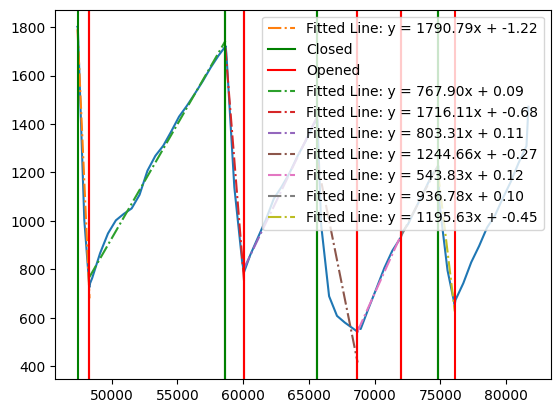

Closing:  [{'k': 0.09432476128712663, 'b': 767.9028441551865, 'length': 10341}, {'k': 0.11273321798115803, 'b': 803.3057249369017, 'length': 5584}, {'k': 0.12022889386518412, 'b': 543.8322901913411, 'length': 3318}, {'k': 0.10365498411764734, 'b': 936.7759770624006, 'length': 2829}]
Opening:  [{'k': -1.2162349678123963, 'b': 1790.792929706079, 'length': 913}, {'k': -0.6778548109988232, 'b': 1716.1078675827848, 'length': 1420}, {'k': -0.26991699299933836, 'b': 1244.6589954951166, 'length': 3071}, {'k': -0.44911054287721014, 'b': 1195.6255860516374, 'length': 1267}]


In [24]:
opening_lines = list()
closing_lines = list()
plt.figure()
plt.plot(data['in_seconds'], data["co2"])

for i in range(len(ind)-1):
    subset = data.loc[ind[i]:ind[i+1]+1].copy()
    time_offset = subset['in_seconds'].iloc[0]
    subset['in_seconds'] = subset['in_seconds'] - time_offset

    koefs = np.polyfit(subset['in_seconds'], subset["co2"], deg=1)
    fitted_line = np.polyval(koefs, subset['in_seconds'])

    # Adjusting x-values for the original time scale
    plt.plot(subset['in_seconds'] + time_offset, fitted_line, label=f'Fitted Line: y = {koefs[1]:.2f}x + {koefs[0]:.2f}', linestyle='-.')

    for index, row in subset.iterrows():
        # Adjust the position of the vertical lines as well
        if row['comment'] == "closed":
            plt.axvline(row['in_seconds'] + time_offset, color='red', label='Opened' if 'Opened' not in plt.gca().get_legend_handles_labels()[1] else "")
        elif row['comment'] == 'opened':
            plt.axvline(row['in_seconds'] + time_offset, color='green', label='Closed' if 'Closed' not in plt.gca().get_legend_handles_labels()[1] else "")

    length = subset['in_seconds'].iloc[len(subset)-1]
    if subset['comment'].iloc[0] == 'opened':
        opening_lines.append({'k':koefs[0], 'b':koefs[1], "length":length})
    else:
        closing_lines.append({'k':koefs[0], 'b':koefs[1], "length":length})

plt.legend()
plt.show()

print("Closing: ", closing_lines)
print("Opening: ", opening_lines)


In [53]:
open_slope = [i['k'] for i in opening_lines]
close_slope = [i['k'] for i in closing_lines]
print(open_slope)
print(close_slope)

[-1.2162349678123963, -0.6778548109988232, -0.26991699299933836, -0.44911054287721014]
[0.09432476128712663, 0.11273321798115803, 0.12022889386518412, 0.10365498411764734]


In [55]:
window_and_door= open_slope.pop(0) # had open door and window simultaneously 
close_slope.pop(2) # not linear trend (probably sport or opening door)

0.12022889386518412

In [57]:
#in minutes:
window_and_door = window_and_door*60
open_slope = [i*60 for i in open_slope]
close_slope = [i*60 for i in close_slope]

In [58]:
open_slope

[-40.67128865992939, -16.195019579960302, -26.94663257263261]

In [59]:
close_slope

[5.6594856772275985, 6.763993078869482, 6.219299047058841]

In [60]:
open_slope_avg = np.mean(open_slope)
open_slope_var = np.var(open_slope)
close_slope_avg = np.mean(close_slope)
close_slope_var = np.var(close_slope)





In [61]:
ratio = open_slope_avg/((-1)*close_slope_avg)

In [62]:
ratio

4.495732433089136

In [63]:
close_slope_avg

6.2142592677186395

In [67]:
ratio_window_and_door = window_and_door/((-1)*close_slope_avg)

In [74]:
time_ventilating_window_door_per_hour = 60/(ratio_window_and_door+1)

In [75]:
time_ventilating_window_door_per_hour

4.708464332438379